In [1]:
import pandas as pd
import os

In [4]:
file_Option = os.listdir("./")

In [5]:
#Taking data from CSV files to dataframe
DF_DICT = {}
for file in file_Option:
    split_file_name = file.split(".")
    if split_file_name[-1] == "csv":
        name = split_file_name[0].split("_")[0]
        DF_DICT[name] = pd.read_csv("./" + file)
        DF_DICT[name].drop(columns=["Unnamed: 0"], index=0, axis=1, inplace=True)
        DF_DICT[name].rename(columns={"Unnamed: 1" : "All Industries"}, inplace=True)

In [8]:
# Making single Dataframe
chosen_DF = pd.DataFrame()
chosen_DF['Industry'] = DF_DICT['2009']["All Industries"]

In [9]:
for year, data in DF_DICT.items():
    chosen_DF[year] = data[data.columns[1]]

In [10]:
# Pre-processing of data 
chosen_DF

,Industry,2013,2018,2009,2014,2011,2016,2017,2010,2015,2012
1,"Agriculture, forestry and fishing",36800,41100,37700,42700,36100,43200,40200,38200,40700,36100
2,Production,164200,165700,156700,173300,158600,162500,165100,149800,172300,154400
3,Construction,89300,101800,96600,97000,90000,102700,90800,93200,92600,91300
4,"Wholesale, retail, transport, hotels and food",345100,347600,345400,337300,343100,360200,333500,344500,357700,347300
5,Information and communication,26900,31500,27800,35700,26400,34400,58900,27900,24000,27200
6,Finance and insurance activities,32400,35500,33800,32400,33200,31000,32100,29800,30800,31100
7,Real estate activities,18000,25200,13500,22200,17600,22700,18200,14600,19100,18800
8,"Professional, scientific and technical activit...",149900,187100,144800,152900,143600,161200,176400,145800,166200,137300
9,"Public administration, defence, education and ...",427000,434900,415600,427600,425600,418500,424500,418600,423200,421000
10,Other service activities,75500,81800,64200,73300,72400,72400,83200,68000,77200,72800


In [13]:
import matplotlib.pyplot as plt

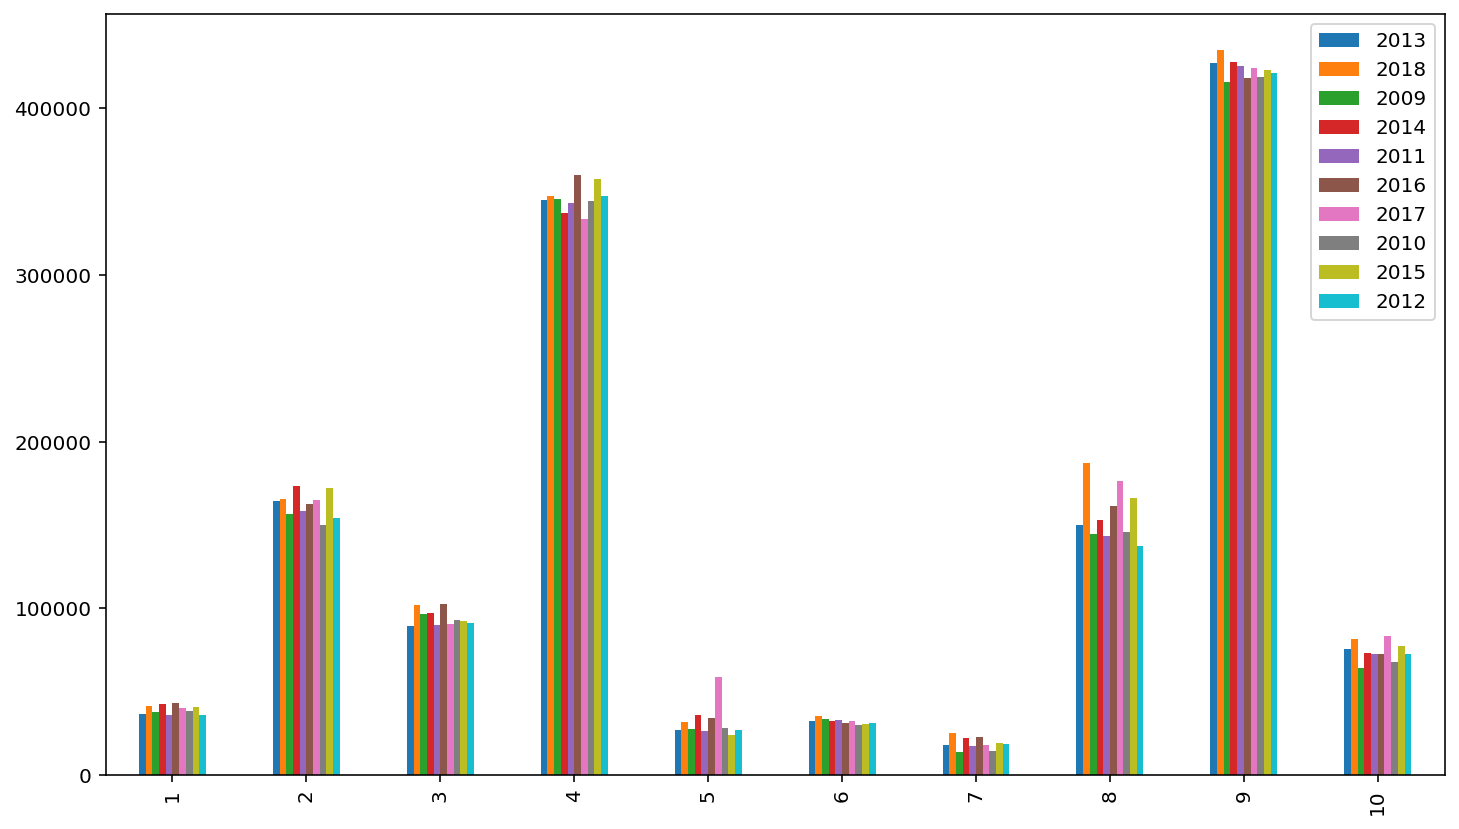

In [15]:
chosen_DF.plot.bar()

In [17]:
# Analysis of data
# It shows maximum & minimum employed workers over 10 yeras
Calculate = list(chosen_DF.iloc[:,1:chosen_DF.shape[1]].sum(axis=1))

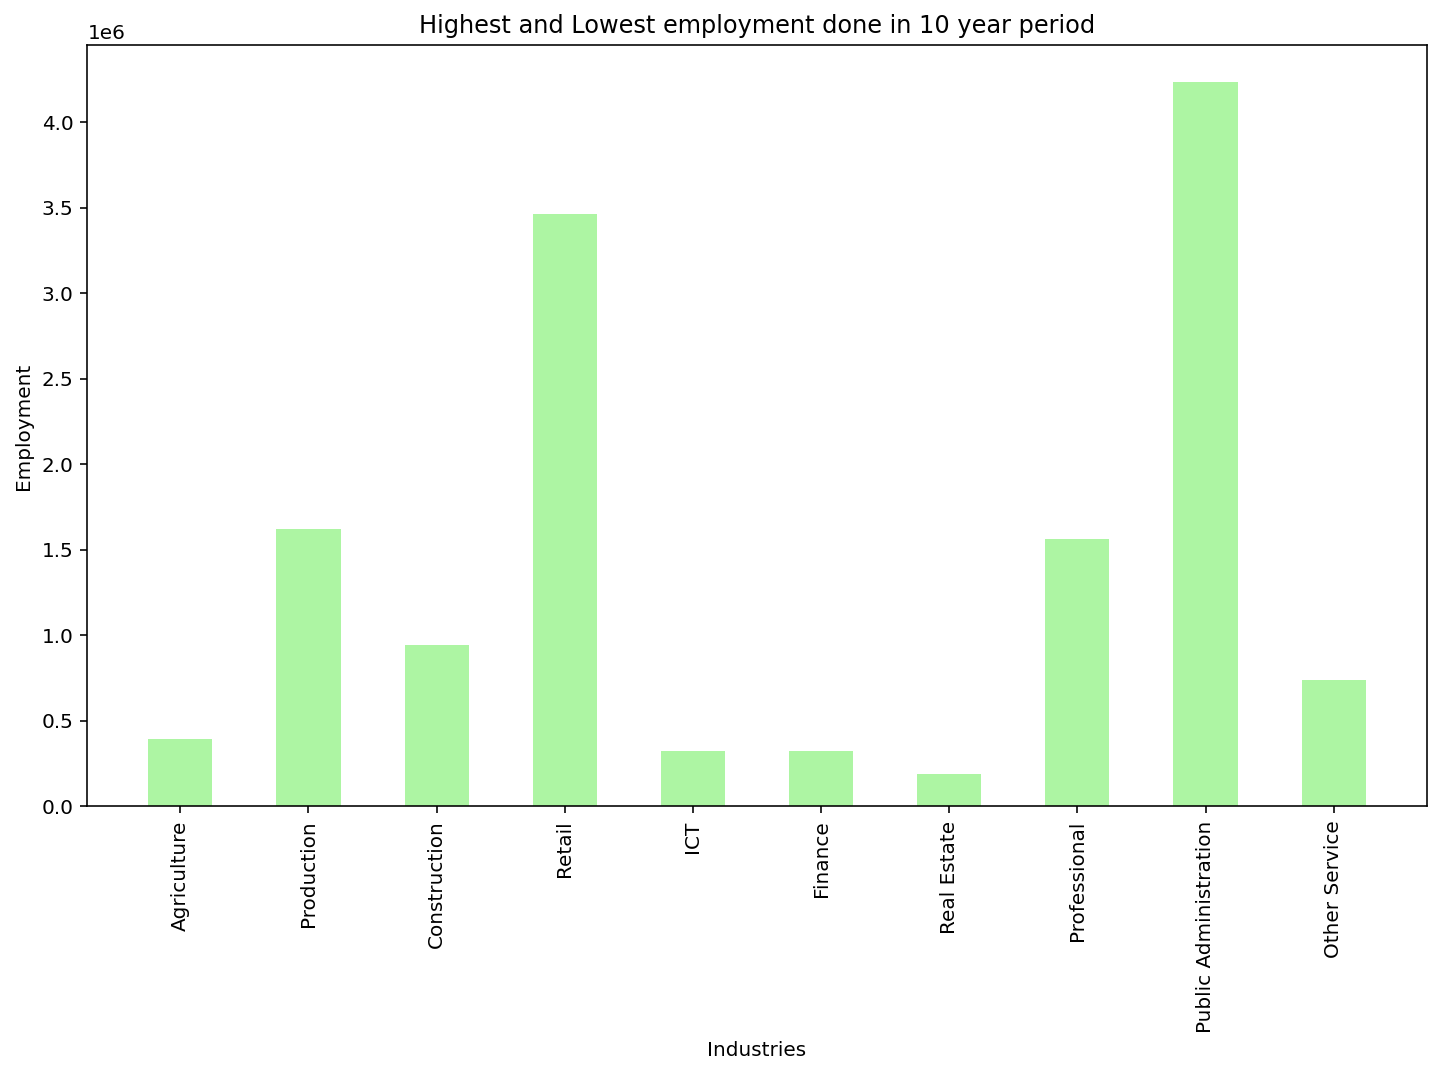

In [20]:
P_units = list(chosen_DF["Industry"])
Q_units = Calculate

tick_label = ['Agriculture', 'Production', 'Construction', 'Retail', 'ICT', 'Finance', 'Real Estate', 'Professional', 'Public Administration', 'Other Service']
plt.bar(P_units, Q_units, tick_label=tick_label, width=0.5, color=(0.2,0.9,0.1,0.4))
plt.xlabel('Industries')
plt.ylabel('Employment')
plt.xticks(rotation=90)
plt.title('Highest and Lowest employment done in 10 year period')

plt.show()

In [21]:
# importing packages
import numpy as np

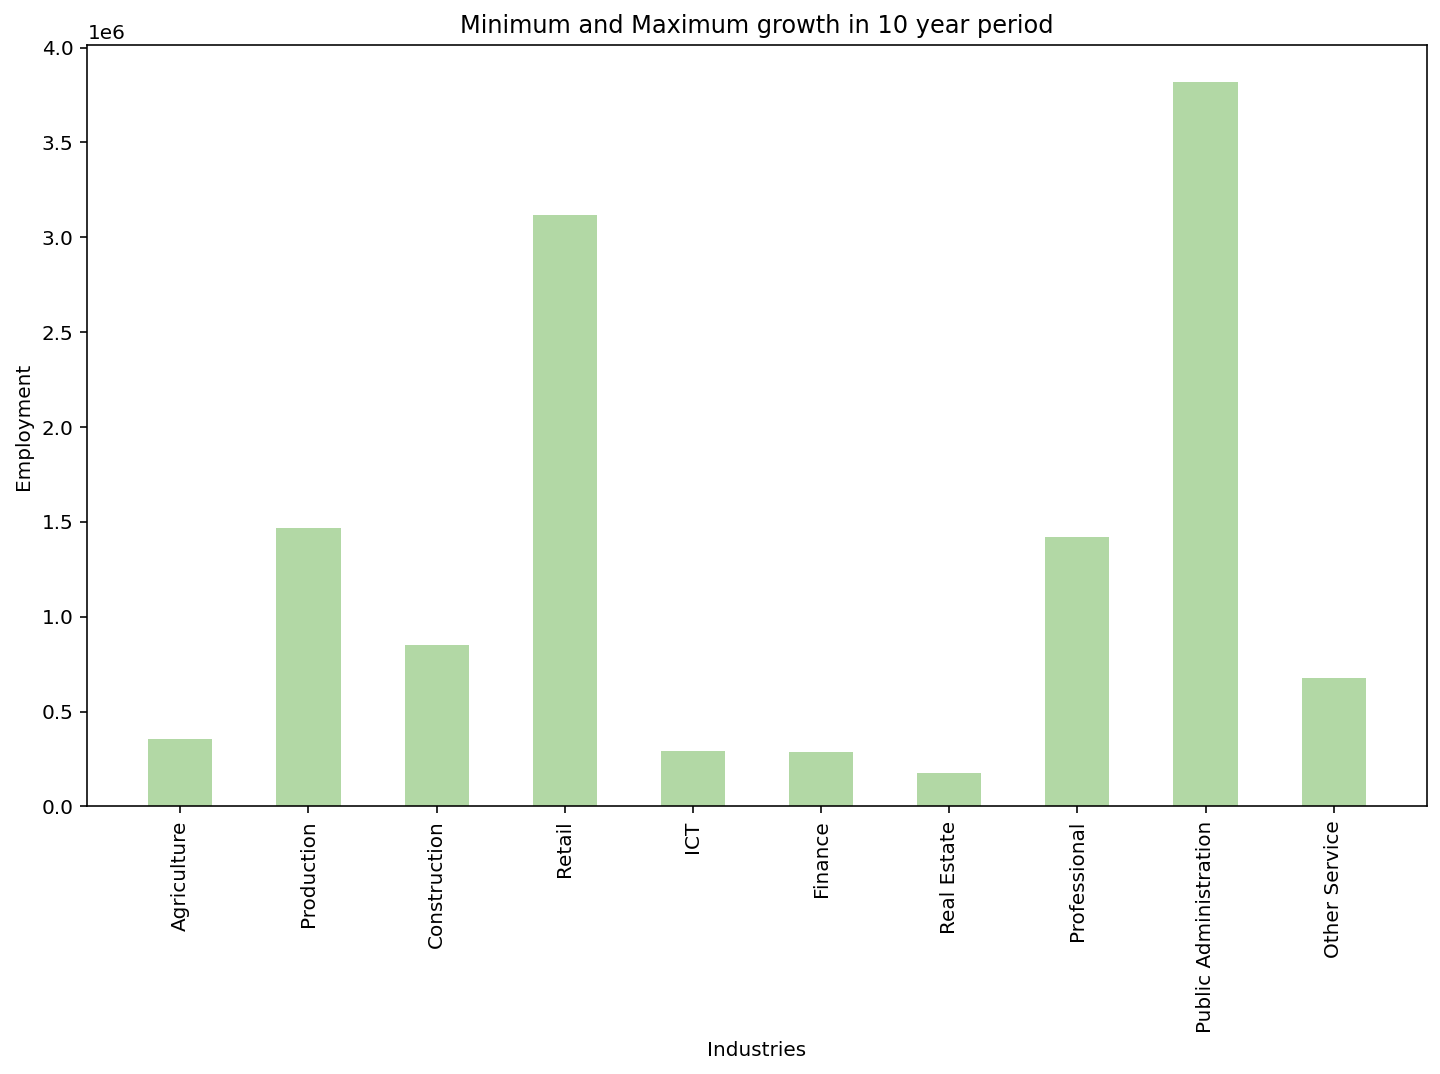

In [22]:
P_units = list(chosen_DF["Industry"])
Q_units = np.array(Calculate) - np.array(chosen_DF["2009"])

tick_label = ['Agriculture', 'Production', 'Construction', 'Retail', 'ICT', 'Finance', 'Real Estate', 'Professional', 'Public Administration', 'Other Service']
plt.bar(P_units, Q_units, tick_label=tick_label, width=0.5, color=(0.4,0.7,0.3,0.5))
plt.xlabel('Industries')
plt.ylabel('Employment')
plt.xticks(rotation=90)
plt.title('Minimum and Maximum growth in 10 year period')

plt.show()

In [23]:
# Per year Employment 

In [24]:
Employment_per_year = list(chosen_DF.iloc[:,1:chosen_DF.shape[1]].sum(axis=0))

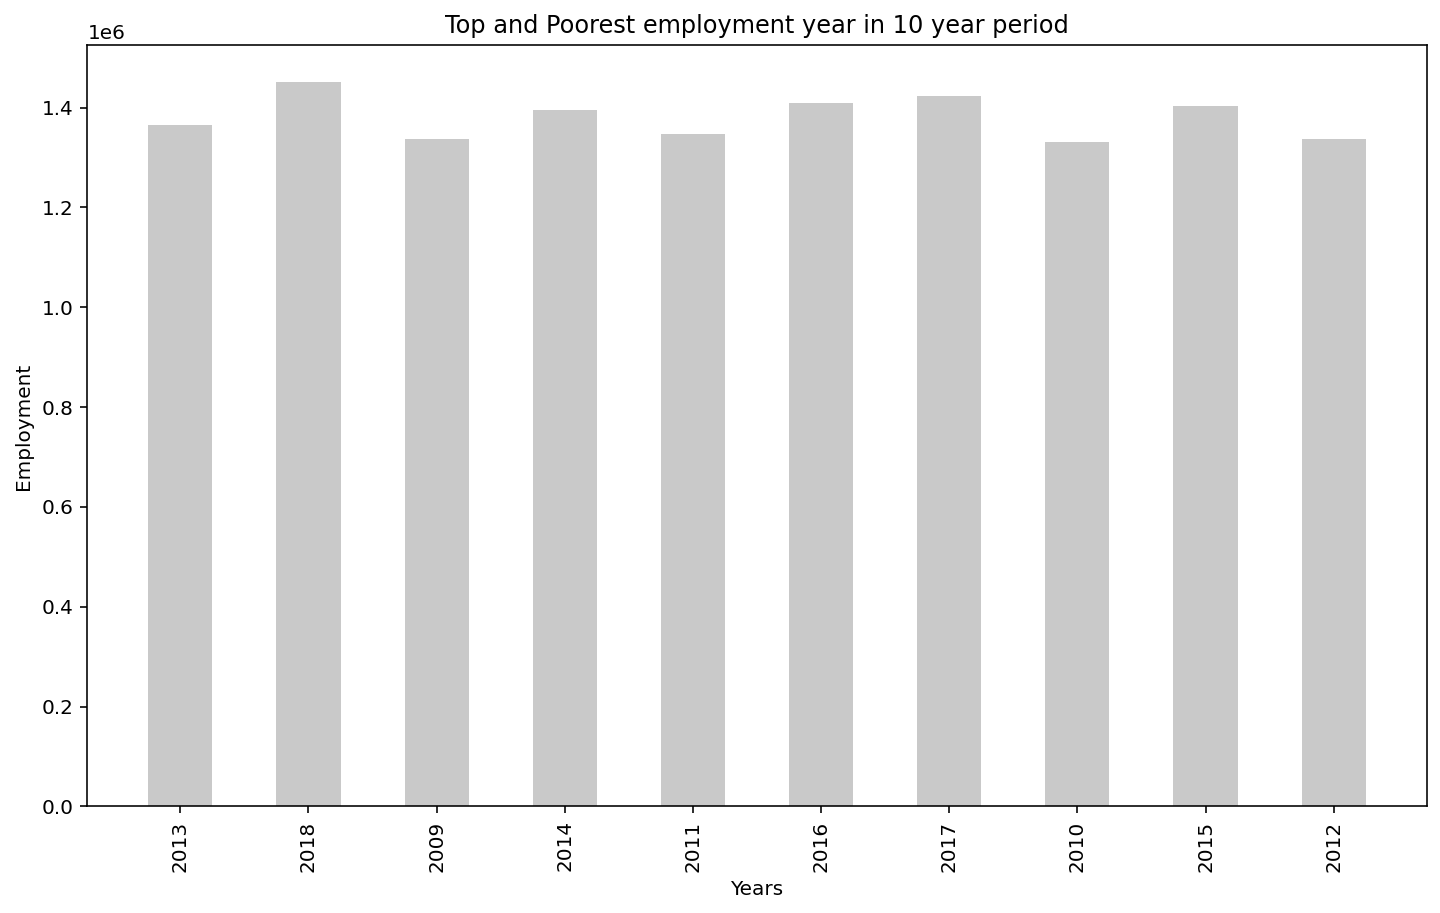

In [29]:
P_units = list(chosen_DF.columns[1:])
Q_units = Employment_per_year

plt.bar(P_units, Q_units, width=0.5,color=(0.3,0.3,0.3,0.3))
plt.xlabel('Years')
plt.ylabel('Employment')
plt.xticks(rotation=90)
plt.title('Top and Poorest employment year in 10 year period')

plt.show()

In [30]:
# Scatter Plot showing the change of worforce over period

In [33]:
# import packages
import plotly.express as px

In [32]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [34]:
pyo.init_notebook_mode()
data = []

fig = go.Figure()

count = 0
for indutry in chosen_DF["Industry"]:
    fig.add_trace(go.Scatter(P=chosen_DF.columns[1:], 
                             y=chosen_DF.iloc[count,1:], 
                             name=tick_label[count],
                             mode='markers',
                             marker={'size':5}))
    count += 1

fig.show()

ValueError: Invalid property specified for object of type plotly.graph_objs.Scatter: 'P'

    Valid properties:
        cliponaxis
            Determines whether or not markers and text nodes are
            clipped about the subplot axes. To show markers and
            text nodes above axis lines and tick labels, make sure
            to set `xaxis.layer` and `yaxis.layer` to *below
            traces*.
        connectgaps
            Determines whether or not gaps (i.e. {nan} or missing
            values) in the provided data arrays are connected.
        customdata
            Assigns extra data each datum. This may be useful when
            listening to hover, click and selection events. Note
            that, "scatter" traces also appends customdata items in
            the markers DOM elements
        customdatasrc
            Sets the source reference on plot.ly for  customdata .
        dx
            Sets the x coordinate step. See `x0` for more info.
        dy
            Sets the y coordinate step. See `y0` for more info.
        error_x
            plotly.graph_objects.scatter.ErrorX instance or dict
            with compatible properties
        error_y
            plotly.graph_objects.scatter.ErrorY instance or dict
            with compatible properties
        fill
            Sets the area to fill with a solid color. Defaults to
            "none" unless this trace is stacked, then it gets
            "tonexty" ("tonextx") if `orientation` is "v" ("h") Use
            with `fillcolor` if not "none". "tozerox" and "tozeroy"
            fill to x=0 and y=0 respectively. "tonextx" and
            "tonexty" fill between the endpoints of this trace and
            the endpoints of the trace before it, connecting those
            endpoints with straight lines (to make a stacked area
            graph); if there is no trace before it, they behave
            like "tozerox" and "tozeroy". "toself" connects the
            endpoints of the trace (or each segment of the trace if
            it has gaps) into a closed shape. "tonext" fills the
            space between two traces if one completely encloses the
            other (eg consecutive contour lines), and behaves like
            "toself" if there is no trace before it. "tonext"
            should not be used if one trace does not enclose the
            other. Traces in a `stackgroup` will only fill to (or
            be filled to) other traces in the same group. With
            multiple `stackgroup`s or some traces stacked and some
            not, if fill-linked traces are not already consecutive,
            the later ones will be pushed down in the drawing
            order.
        fillcolor
            Sets the fill color. Defaults to a half-transparent
            variant of the line color, marker color, or marker line
            color, whichever is available.
        groupnorm
            Only relevant when `stackgroup` is used, and only the
            first `groupnorm` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the normalization for the sum of
            this `stackgroup`. With "fraction", the value of each
            trace at each location is divided by the sum of all
            trace values at that location. "percent" is the same
            but multiplied by 100 to show percentages. If there are
            multiple subplots, or multiple `stackgroup`s on one
            subplot, each will be normalized within its own set.
        hoverinfo
            Determines which trace information appear on hover. If
            `none` or `skip` are set, no information is displayed
            upon hovering. But, if `none` is set, click and hover
            events are still fired.
        hoverinfosrc
            Sets the source reference on plot.ly for  hoverinfo .
        hoverlabel
            plotly.graph_objects.scatter.Hoverlabel instance or
            dict with compatible properties
        hoveron
            Do the hover effects highlight individual points
            (markers or line points) or do they highlight filled
            regions? If the fill is "toself" or "tonext" and there
            are no markers or text, then the default is "fills",
            otherwise it is "points".
        hovertemplate
            Template string used for rendering the information that
            appear on hover box. Note that this will override
            `hoverinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. The variables
            available in `hovertemplate` are the ones emitted as
            event data described at this link
            https://plot.ly/javascript/plotlyjs-events/#event-data.
            Additionally, every attributes that can be specified
            per-point (the ones that are `arrayOk: true`) are
            available.  Anything contained in tag `<extra>` is
            displayed in the secondary box, for example
            "<extra>{fullData.name}</extra>". To hide the secondary
            box completely, use an empty tag `<extra></extra>`.
        hovertemplatesrc
            Sets the source reference on plot.ly for  hovertemplate
            .
        hovertext
            Sets hover text elements associated with each (x,y)
            pair. If a single string, the same string appears over
            all the data points. If an array of string, the items
            are mapped in order to the this trace's (x,y)
            coordinates. To be seen, trace `hoverinfo` must contain
            a "text" flag.
        hovertextsrc
            Sets the source reference on plot.ly for  hovertext .
        ids
            Assigns id labels to each datum. These ids for object
            constancy of data points during animation. Should be an
            array of strings, not numbers or any other type.
        idssrc
            Sets the source reference on plot.ly for  ids .
        legendgroup
            Sets the legend group for this trace. Traces part of
            the same legend group hide/show at the same time when
            toggling legend items.
        line
            plotly.graph_objects.scatter.Line instance or dict with
            compatible properties
        marker
            plotly.graph_objects.scatter.Marker instance or dict
            with compatible properties
        meta
            Assigns extra meta information associated with this
            trace that can be used in various text attributes.
            Attributes such as trace `name`, graph, axis and
            colorbar `title.text`, annotation `text`
            `rangeselector`, `updatemenues` and `sliders` `label`
            text all support `meta`. To access the trace `meta`
            values in an attribute in the same trace, simply use
            `%{meta[i]}` where `i` is the index or key of the
            `meta` item in question. To access trace `meta` in
            layout attributes, use `%{data[n[.meta[i]}` where `i`
            is the index or key of the `meta` and `n` is the trace
            index.
        metasrc
            Sets the source reference on plot.ly for  meta .
        mode
            Determines the drawing mode for this scatter trace. If
            the provided `mode` includes "text" then the `text`
            elements appear at the coordinates. Otherwise, the
            `text` elements appear on hover. If there are less than
            20 points and the trace is not stacked then the default
            is "lines+markers". Otherwise, "lines".
        name
            Sets the trace name. The trace name appear as the
            legend item and on hover.
        opacity
            Sets the opacity of the trace.
        orientation
            Only relevant when `stackgroup` is used, and only the
            first `orientation` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Sets the stacking direction. With "v"
            ("h"), the y (x) values of subsequent traces are added.
            Also affects the default value of `fill`.
        r
            r coordinates in scatter traces are deprecated!Please
            switch to the "scatterpolar" trace type.Sets the radial
            coordinatesfor legacy polar chart only.
        rsrc
            Sets the source reference on plot.ly for  r .
        selected
            plotly.graph_objects.scatter.Selected instance or dict
            with compatible properties
        selectedpoints
            Array containing integer indices of selected points.
            Has an effect only for traces that support selections.
            Note that an empty array means an empty selection where
            the `unselected` are turned on for all points, whereas,
            any other non-array values means no selection all where
            the `selected` and `unselected` styles have no effect.
        showlegend
            Determines whether or not an item corresponding to this
            trace is shown in the legend.
        stackgaps
            Only relevant when `stackgroup` is used, and only the
            first `stackgaps` found in the `stackgroup` will be
            used - including if `visible` is "legendonly" but not
            if it is `false`. Determines how we handle locations at
            which other traces in this group have data but this one
            does not. With *infer zero* we insert a zero at these
            locations. With "interpolate" we linearly interpolate
            between existing values, and extrapolate a constant
            beyond the existing values.
        stackgroup
            Set several scatter traces (on the same subplot) to the
            same stackgroup in order to add their y values (or
            their x values if `orientation` is "h"). If blank or
            omitted this trace will not be stacked. Stacking also
            turns `fill` on by default, using "tonexty" ("tonextx")
            if `orientation` is "h" ("v") and sets the default
            `mode` to "lines" irrespective of point count. You can
            only stack on a numeric (linear or log) axis. Traces in
            a `stackgroup` will only fill to (or be filled to)
            other traces in the same group. With multiple
            `stackgroup`s or some traces stacked and some not, if
            fill-linked traces are not already consecutive, the
            later ones will be pushed down in the drawing order.
        stream
            plotly.graph_objects.scatter.Stream instance or dict
            with compatible properties
        t
            t coordinates in scatter traces are deprecated!Please
            switch to the "scatterpolar" trace type.Sets the
            angular coordinatesfor legacy polar chart only.
        text
            Sets text elements associated with each (x,y) pair. If
            a single string, the same string appears over all the
            data points. If an array of string, the items are
            mapped in order to the this trace's (x,y) coordinates.
            If trace `hoverinfo` contains a "text" flag and
            "hovertext" is not set, these elements will be seen in
            the hover labels.
        textfont
            Sets the text font.
        textposition
            Sets the positions of the `text` elements with respects
            to the (x,y) coordinates.
        textpositionsrc
            Sets the source reference on plot.ly for  textposition
            .
        textsrc
            Sets the source reference on plot.ly for  text .
        texttemplate
            Template string used for rendering the information text
            that appear on points. Note that this will override
            `textinfo`. Variables are inserted using %{variable},
            for example "y: %{y}". Numbers are formatted using
            d3-format's syntax %{variable:d3-format}, for example
            "Price: %{y:$.2f}". https://github.com/d3/d3-3.x-api-
            reference/blob/master/Formatting.md#d3_format for
            details on the formatting syntax. Dates are formatted
            using d3-time-format's syntax %{variable|d3-time-
            format}, for example "Day: %{2019-01-01|%A}".
            https://github.com/d3/d3-3.x-api-
            reference/blob/master/Time-Formatting.md#format for
            details on the date formatting syntax. Every attributes
            that can be specified per-point (the ones that are
            `arrayOk: true`) are available.
        texttemplatesrc
            Sets the source reference on plot.ly for  texttemplate
            .
        tsrc
            Sets the source reference on plot.ly for  t .
        uid
            Assign an id to this trace, Use this to provide object
            constancy between traces during animations and
            transitions.
        uirevision
            Controls persistence of some user-driven changes to the
            trace: `constraintrange` in `parcoords` traces, as well
            as some `editable: true` modifications such as `name`
            and `colorbar.title`. Defaults to `layout.uirevision`.
            Note that other user-driven trace attribute changes are
            controlled by `layout` attributes: `trace.visible` is
            controlled by `layout.legend.uirevision`,
            `selectedpoints` is controlled by
            `layout.selectionrevision`, and `colorbar.(x|y)`
            (accessible with `config: {editable: true}`) is
            controlled by `layout.editrevision`. Trace changes are
            tracked by `uid`, which only falls back on trace index
            if no `uid` is provided. So if your app can add/remove
            traces before the end of the `data` array, such that
            the same trace has a different index, you can still
            preserve user-driven changes if you give each trace a
            `uid` that stays with it as it moves.
        unselected
            plotly.graph_objects.scatter.Unselected instance or
            dict with compatible properties
        visible
            Determines whether or not this trace is visible. If
            "legendonly", the trace is not drawn, but can appear as
            a legend item (provided that the legend itself is
            visible).
        x
            Sets the x coordinates.
        x0
            Alternate to `x`. Builds a linear space of x
            coordinates. Use with `dx` where `x0` is the starting
            coordinate and `dx` the step.
        xaxis
            Sets a reference between this trace's x coordinates and
            a 2D cartesian x axis. If "x" (the default value), the
            x coordinates refer to `layout.xaxis`. If "x2", the x
            coordinates refer to `layout.xaxis2`, and so on.
        xcalendar
            Sets the calendar system to use with `x` date data.
        xsrc
            Sets the source reference on plot.ly for  x .
        y
            Sets the y coordinates.
        y0
            Alternate to `y`. Builds a linear space of y
            coordinates. Use with `dy` where `y0` is the starting
            coordinate and `dy` the step.
        yaxis
            Sets a reference between this trace's y coordinates and
            a 2D cartesian y axis. If "y" (the default value), the
            y coordinates refer to `layout.yaxis`. If "y2", the y
            coordinates refer to `layout.yaxis2`, and so on.
        ycalendar
            Sets the calendar system to use with `y` date data.
        ysrc
            Sets the source reference on plot.ly for  y .
        

In [35]:
# Correlation among Industries 

In [36]:
T_DF = chosen_DF.T

In [37]:
for column in T_DF.columns:
    T_DF.rename(columns={column: T_DF[column][0]}, inplace=True)
    
T_DF.drop(["Industry"], inplace = True)
corr_mat = T_DF.astype(float).corr(method='kendall')
corr_mat

,"Agriculture, forestry and fishing",Production,Construction,"Wholesale, retail, transport, hotels and food",Information and communication,Finance and insurance activities,Real estate activities,"Professional, scientific and technical activities; administrative and support service activities","Public administration, defence, education and health",Other service activities
"Agriculture, forestry and fishing",1.000000,0.449467,0.584307,0.179787,0.494413,-0.068182,0.539360,0.584307,0.089893,0.159091
Production,0.449467,1.000000,0.111111,-0.022222,0.111111,0.134840,0.511111,0.511111,0.466667,0.494413
Construction,0.584307,0.111111,1.000000,0.333333,0.377778,-0.044947,0.422222,0.244444,-0.244444,-0.134840
"Wholesale, retail, transport, hotels and food",0.179787,-0.022222,0.333333,1.000000,-0.200000,-0.044947,0.288889,0.022222,-0.200000,-0.089893
Information and communication,0.494413,0.111111,0.377778,-0.200000,1.000000,0.044947,0.155556,0.333333,0.022222,0.134840
Finance and insurance activities,-0.068182,0.134840,-0.044947,-0.044947,0.044947,1.000000,-0.089893,0.000000,0.404520,0.068182
Real estate activities,0.539360,0.511111,0.422222,0.288889,0.155556,-0.089893,1.000000,0.466667,0.333333,0.449467
"Professional, scientific and technical activities; administrative and support service activities",0.584307,0.511111,0.244444,0.022222,0.333333,0.000000,0.466667,1.000000,0.333333,0.539360
"Public administration, defence, education and health",0.089893,0.466667,-0.244444,-0.200000,0.022222,0.404520,0.333333,0.333333,1.000000,0.539360
Other service activities,0.159091,0.494413,-0.134840,-0.089893,0.134840,0.068182,0.449467,0.539360,0.539360,1.000000


In [38]:
# Maximum correlation among Industries

In [39]:
column_Maximum = {}
for column in corr_mat.columns:
    column_Maximum[column] = corr_mat[column].nlargest(2).min()

In [40]:
Industry_correlation = {}
np_highest = np.array(list(column_Maximum.values()))
Industry_correlation['max']= str(corr_mat.columns[np_highest.argmax()]) + " indutry has max relation with " +\
str(corr_mat.index[corr_mat[corr_mat.columns[np_highest.argmax()]]==np_highest.max()].tolist()[0]) + \
" industry by correlation coefficient " + str(np_highest.max())

In [43]:
#Minimum correlation between Industries
column_Minimum = dict(corr_mat.min())
key_min = min(column_Minimum.keys(), key=(lambda k: column_Minimum[k]))

Industry_correlation['min']= key_min + " indutry has max relation with " +\
str(corr_mat.index[corr_mat[key_min]==min(list(column_Minimum.values()))].tolist()[0]) +\
" industry by correlation coefficient " + str(min(list(column_Minimum.values())))

In [45]:
# Maximum industry correlation
Industry_correlation['max']

'Agriculture, forestry and fishing  indutry has max relation with Construction  industry by correlation coefficient 0.5843065474681431'

In [46]:
# Minimum industry correlation
Industry_correlation['min']

'Construction  indutry has max relation with Public administration, defence, education and health  industry by correlation coefficient -0.24444444444444444'

In [47]:
#Correlation Among Years

In [49]:
cor_mat = chosen_DF.corr(method='kendall')
cor_mat

,2013,2018,2009,2014,2011,2016,2017,2010,2015,2012
2013,1.000000,0.955556,1.000000,0.955556,1.000000,0.955556,0.866667,1.000000,1.000000,1.000000
2018,0.955556,1.000000,0.955556,0.911111,0.955556,0.911111,0.911111,0.955556,0.955556,0.955556
2009,1.000000,0.955556,1.000000,0.955556,1.000000,0.955556,0.866667,1.000000,1.000000,1.000000
2014,0.955556,0.911111,0.955556,1.000000,0.955556,1.000000,0.911111,0.955556,0.955556,0.955556
2011,1.000000,0.955556,1.000000,0.955556,1.000000,0.955556,0.866667,1.000000,1.000000,1.000000
2016,0.955556,0.911111,0.955556,1.000000,0.955556,1.000000,0.911111,0.955556,0.955556,0.955556
2017,0.866667,0.911111,0.866667,0.911111,0.866667,0.911111,1.000000,0.866667,0.866667,0.866667
2010,1.000000,0.955556,1.000000,0.955556,1.000000,0.955556,0.866667,1.000000,1.000000,1.000000
2015,1.000000,0.955556,1.000000,0.955556,1.000000,0.955556,0.866667,1.000000,1.000000,1.000000
2012,1.000000,0.955556,1.000000,0.955556,1.000000,0.955556,0.866667,1.000000,1.000000,1.000000


In [50]:
#Maximum correlation among Years
column_Maximum = {}
for column in corr_mat.columns:
    column_Maximum[column] = corr_mat[column].nlargest(2).min()

In [52]:
Industry_correlation = {}
np_highest = np.array(list(column_Maximum.values()))
Industry_correlation['max']= str(corr_mat.columns[np_highest.argmax()]) + " year has max relation with " +\
str(corr_mat.index[corr_mat[corr_mat.columns[np_highest.argmax()]]==np_highest.max()].tolist()[0]) + \
" year by correlation coefficient " + str(np_highest.max())


In [56]:
#Minimum correlation among Years
column_Minimum = dict(corr_mat.min())
key_min = min(column_Minimum.keys(), key=(lambda k: column_Minimum[k]))

Industry_correlation['min']= key_min + " year has max relation with " +\
str(corr_mat.index[corr_mat[key_min]==min(list(column_Minimum.values()))].tolist()[0]) +\
" year by correlation coefficient " + str(min(list(column_Minimum.values())))

In [57]:
# Maximum & Minimum
Industry_correlation['max']

'2013 year has max relation with 2009 year by correlation coefficient 0.9999999999999999'

In [58]:
Industry_correlation['min']

'2013 year has max relation with 2017 year by correlation coefficient 0.8666666666666666'

In [59]:
# Poorest performing year is 2009 while Top performing year is 20118

In [60]:
from sklearn import preprocessing
Le = preprocessing.LabelEncoder()
chosen_DF["Industry"]=Le.fit_transform(chosen_DF["Industry"])


In [61]:
from sklearn.cluster import KMeans

[0 0 0 1 0 0 0 0 1 0]


Text(0.5, 1.0, 'The dataset post clustering')

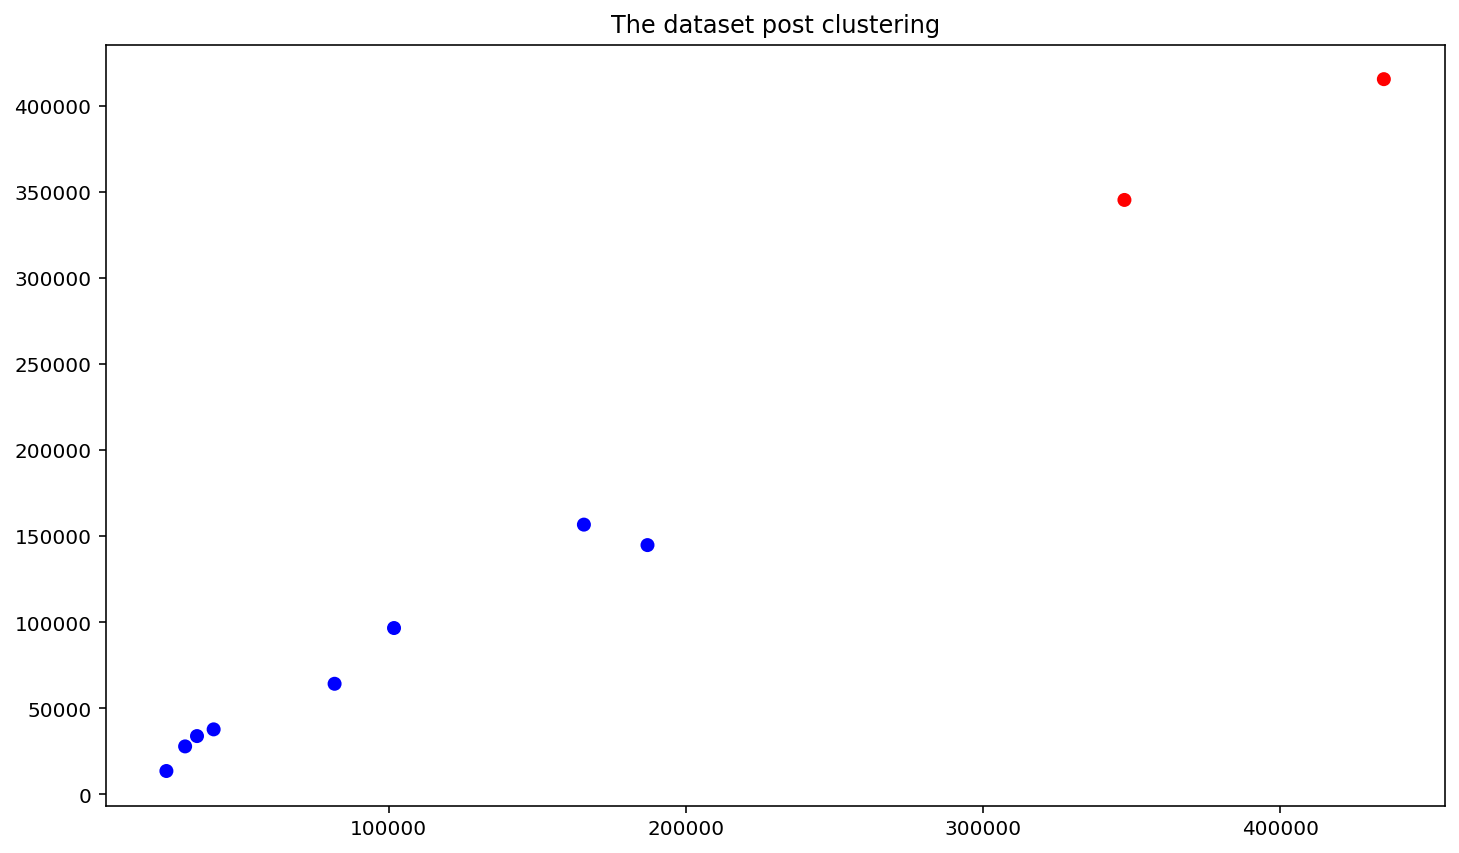

In [62]:
# For cluster =2
clustering_2 = KMeans(n_clusters =2,random_state=1)
clustering_2.fit(chosen_DF)
print(clustering_2.labels_)
color2=np.array(['blue','red'])
plt.scatter(x=chosen_DF["2018"],y=chosen_DF["2009"],c=color2[clustering_2.labels_])
plt.title("The dataset post clustering")

In [63]:
# After applying KMeans with 2 clusters the similar productions in same cluster are Wholesale, retail, transport, hotels and food and Public Administration, defence, education and health

In [64]:
# Three cluster

In [65]:
clustering = KMeans(n_clusters =3,random_state=1)
clustering.fit(chosen_DF)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

[0 2 0 1 0 0 0 2 1 0]


Text(0.5, 1.0, 'The dataset post clustering')

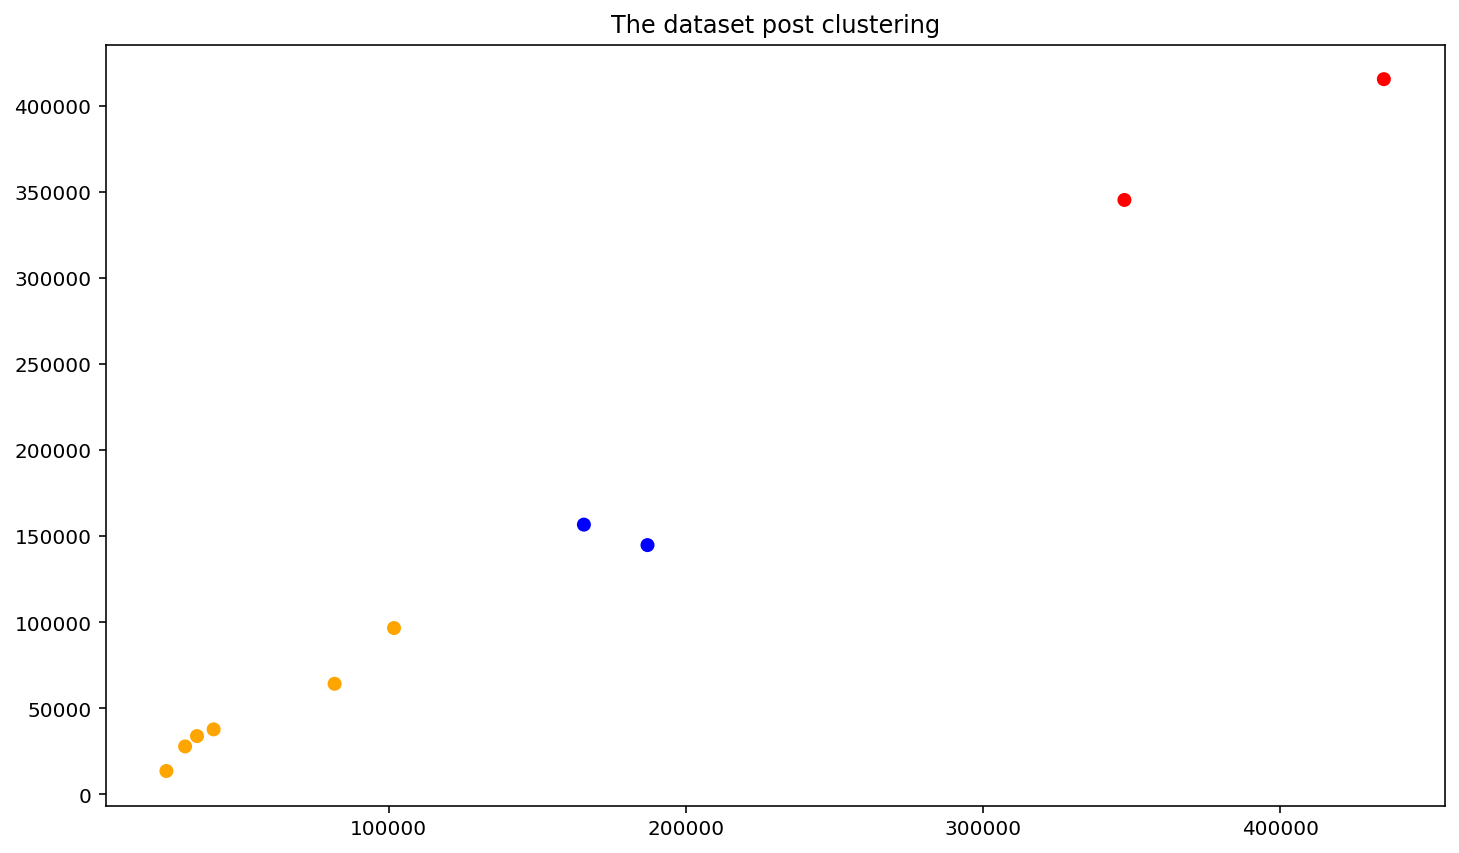

In [66]:
print(clustering.labels_)
color2=np.array(['orange','red','blue'])
plt.scatter(x=chosen_DF["2018"],y=chosen_DF["2009"],c=color2[clustering.labels_])
plt.title("The dataset post clustering")

In [67]:
# After applying KMeans with 3 clusters, result is for 2 cluster= Production & Professional, scientific & technical activities, Administrative support service events. For 1 cluster= Wholesale, retail, transport, hotels, food and public administration, defence, education and health. 0 cluster comprises all remaining productions.

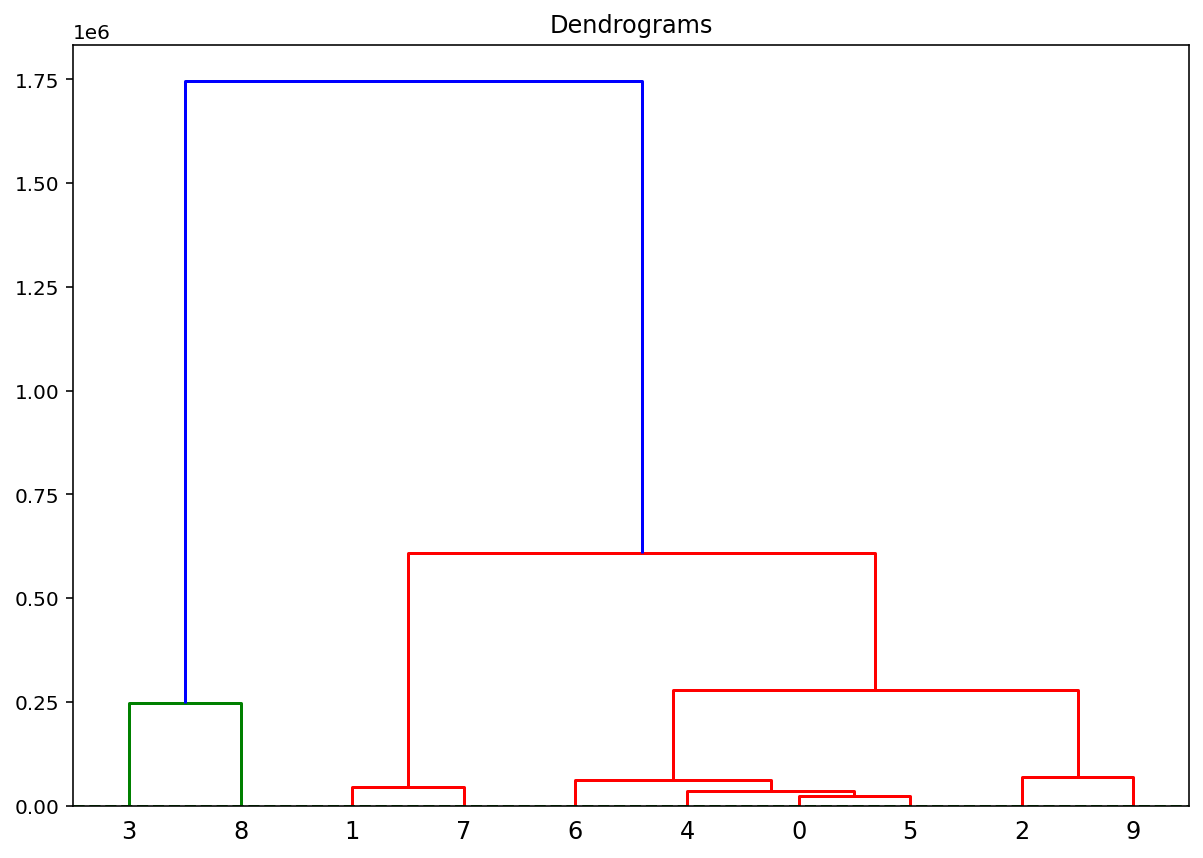

In [69]:
####Herichal clustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(chosen_DF, method='ward'))
plt.axhline(y=6, color='g', linestyle='--')

In [70]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
print(cluster.fit_predict(chosen_DF))

[0 2 0 1 0 0 0 2 1 0]


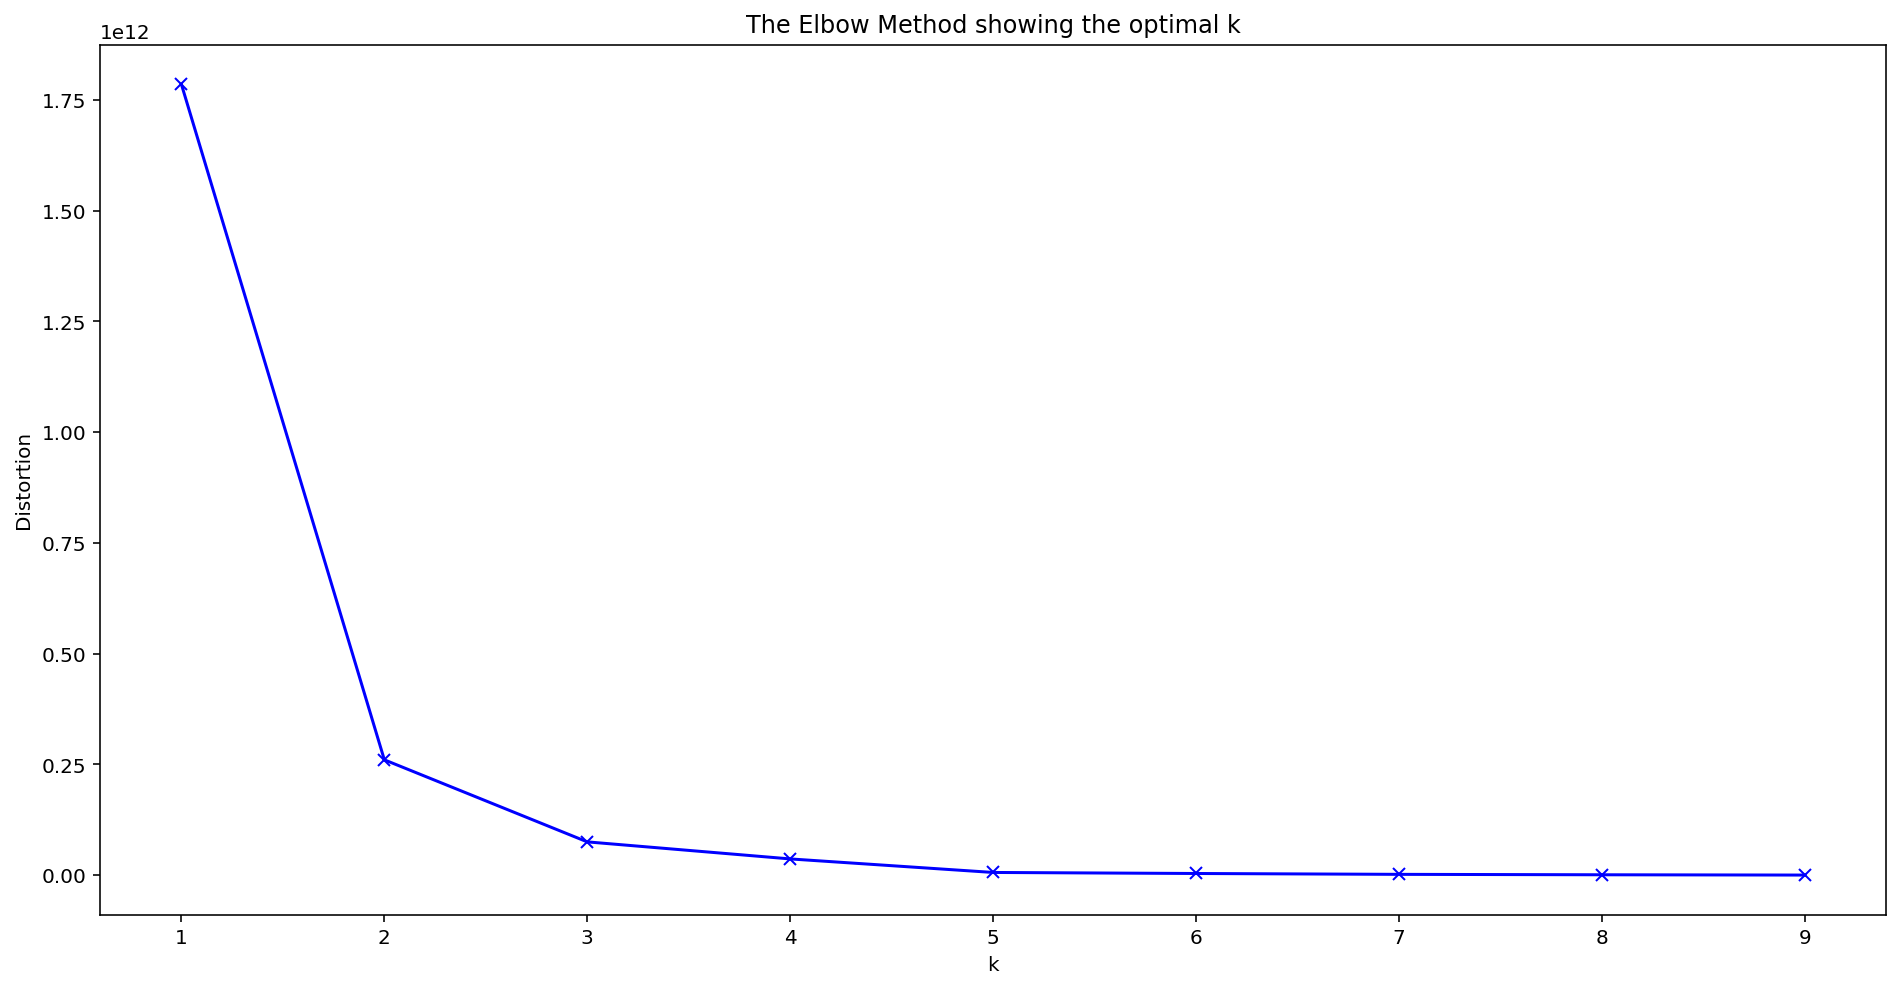

In [76]:
###KMeans and hierarichal clustering with number of cluster =3 shows similar result
##To determine best solution for clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(chosen_DF)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
# From elbow technique it is concluded that optimum number of clusters are 3.